[Статейка](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)

In [341]:
import copy
# ---------------------
import pandas as pd
import numpy as np
import seaborn as se

# Анализ

In [342]:
train_data, test_data = pd.read_csv("data/train.csv", delimiter=','), pd.read_csv("data/test.csv", delimiter=',')
train_data

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [343]:
from statsmodels.tsa.stattools import adfuller

for col in train_data.columns[2:-1]:
    try:
        result = adfuller(train_data[col].values)
        print(f"{col}: ADF Stat: {result[0]}, p-val: {result[1]}")
    except:
        print(":(")

pressure: ADF Stat: -2.560761092880542, p-val: 0.10138132937191924
maxtemp: ADF Stat: -3.17218735305001, p-val: 0.021652091834125357
temparature: ADF Stat: -3.132400312965479, p-val: 0.02424649855247635
mintemp: ADF Stat: -3.5772327010129583, p-val: 0.006211507429705844
dewpoint: ADF Stat: -3.666060911137418, p-val: 0.004616670177867249
humidity: ADF Stat: -12.761400403865851, p-val: 8.128749876526477e-24
cloud: ADF Stat: -8.888448314684064, p-val: 1.26144049986561e-14
sunshine: ADF Stat: -5.868829013842628, p-val: 3.276705325528751e-07
winddirection: ADF Stat: -3.1785839644606084, p-val: 0.02125827468889692
windspeed: ADF Stat: -6.079092756561903, p-val: 1.1032402667870031e-07


In [344]:
from statsmodels.tsa.stattools import kpss
import warnings

warnings.filterwarnings("ignore")

for col in train_data.columns[2:-1]:
    try:
        result = kpss(train_data[col].values, regression="ct", nlags=31*5)
        print(f"{col}: kpss_stat: {result[0]}, p-val: {result[1]}")
    except:
        print(":(")

pressure: kpss_stat: 0.019684884511984982, p-val: 0.1
maxtemp: kpss_stat: 0.019694482760723997, p-val: 0.1
temparature: kpss_stat: 0.019719061522161314, p-val: 0.1
mintemp: kpss_stat: 0.01978226715293557, p-val: 0.1
dewpoint: kpss_stat: 0.0199925159974732, p-val: 0.1
humidity: kpss_stat: 0.03262082104589922, p-val: 0.1
cloud: kpss_stat: 0.02808501796998192, p-val: 0.1
sunshine: kpss_stat: 0.025930409618199018, p-val: 0.1
winddirection: kpss_stat: 0.01992556154226396, p-val: 0.1
windspeed: kpss_stat: 0.02714090865691401, p-val: 0.1


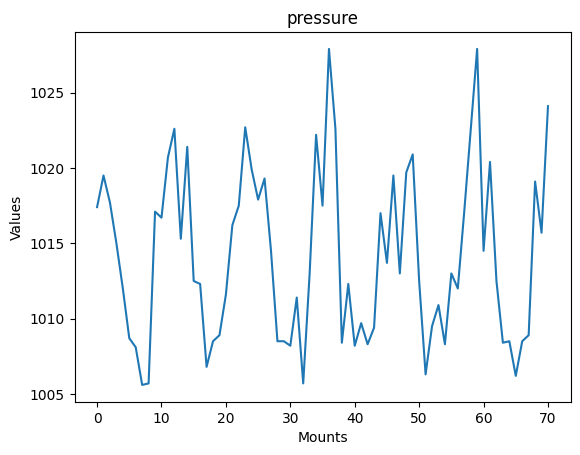

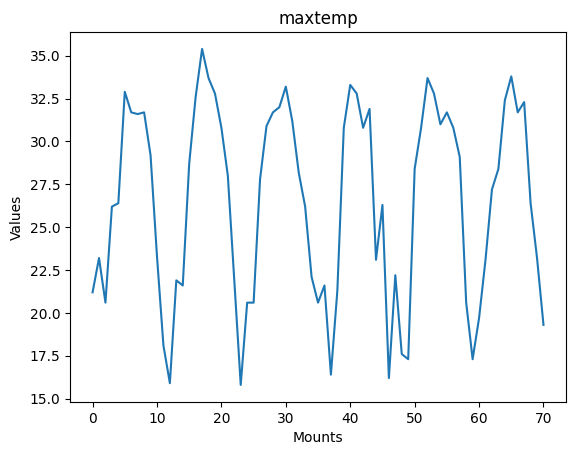

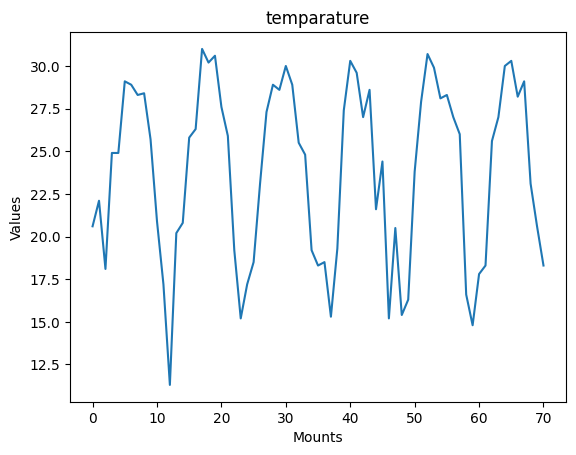

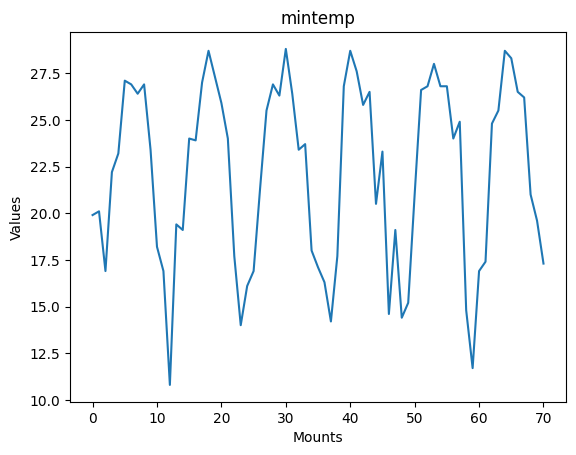

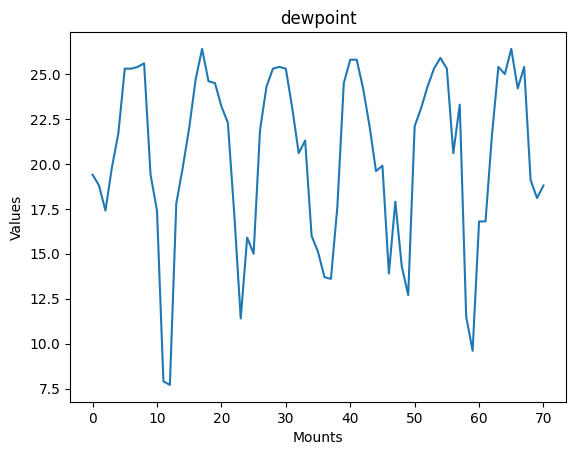

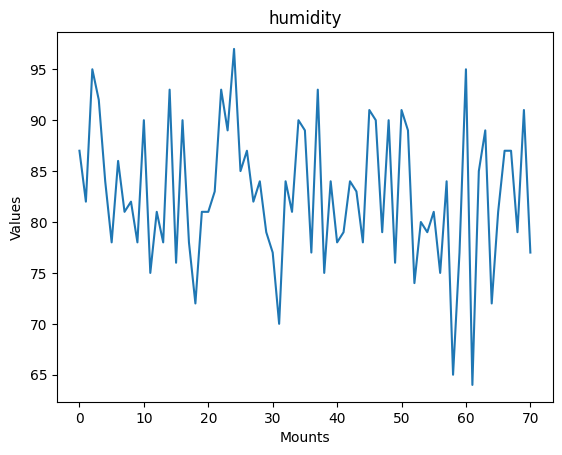

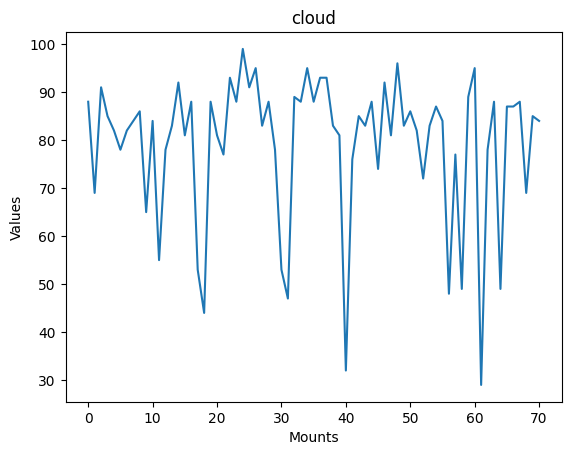

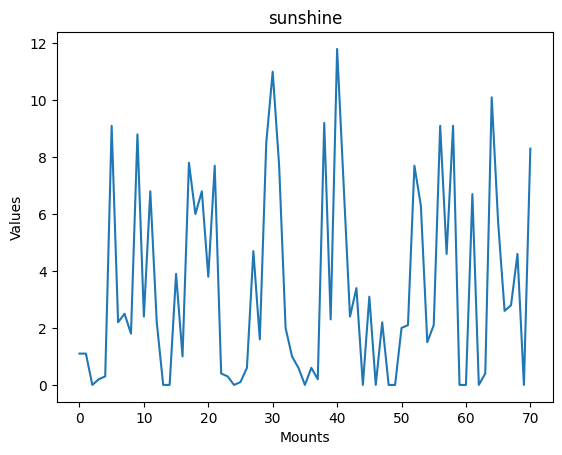

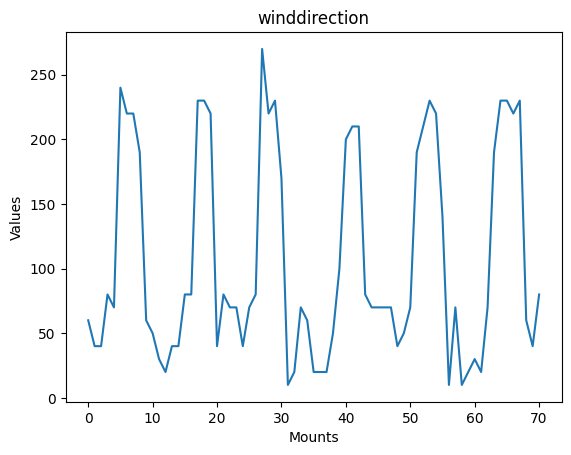

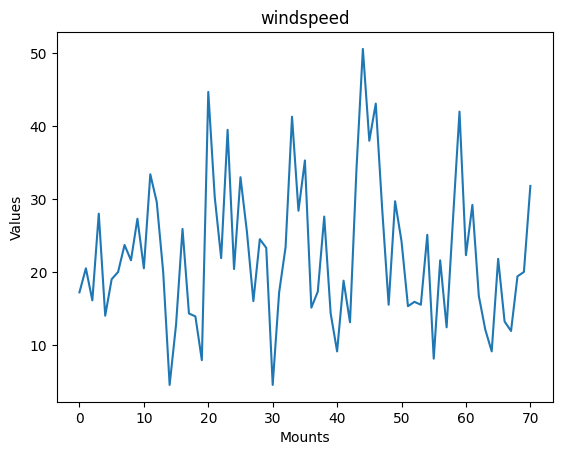

In [345]:
import matplotlib.pyplot as plt

N = 31

for col in train_data.columns[2:-1]:
    pd.DataFrame(train_data[col].values[::N]).plot(title=col, legend=False, xlabel='Mounts', ylabel="Values")

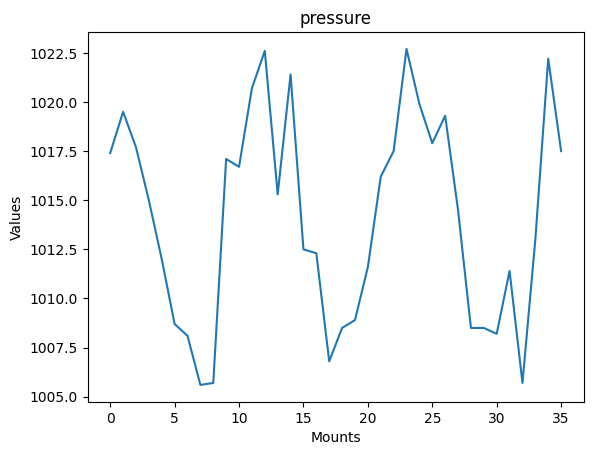

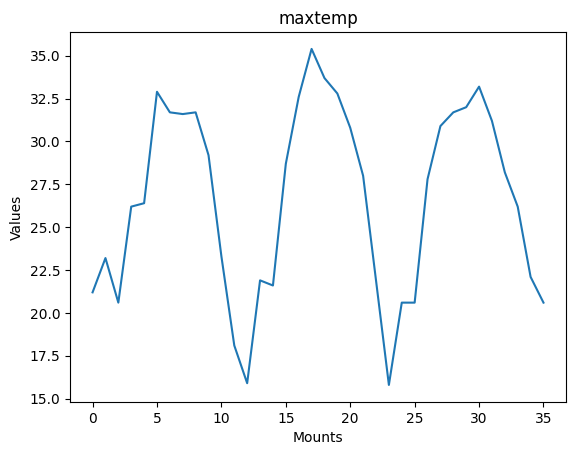

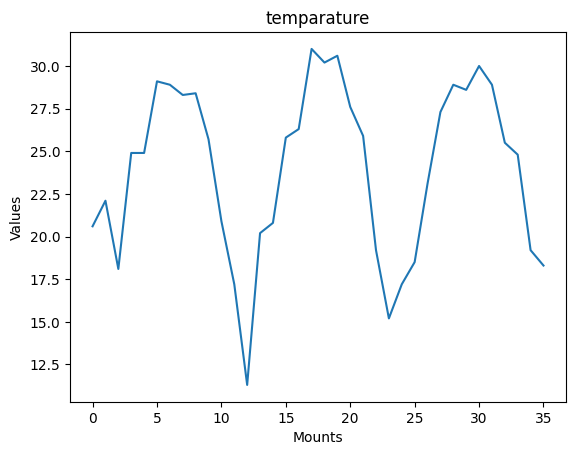

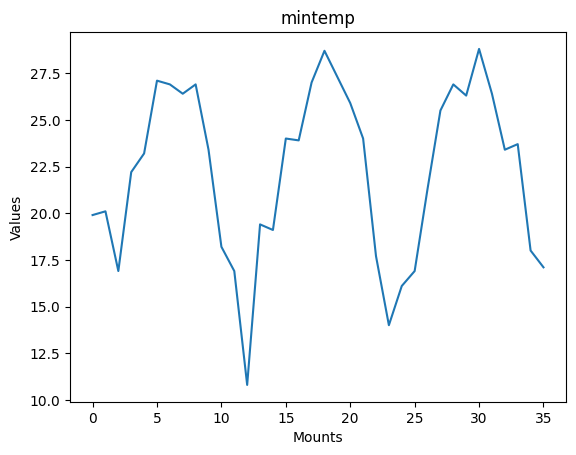

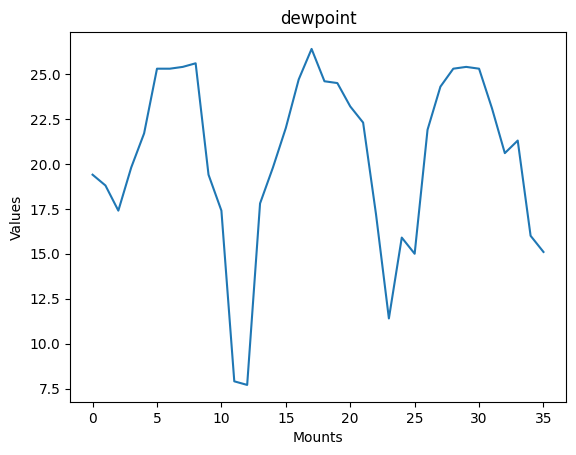

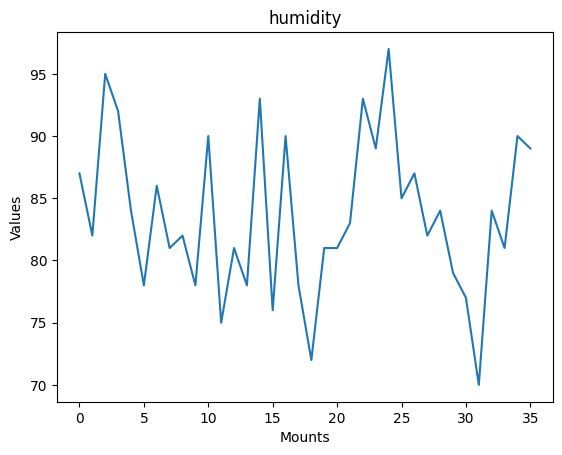

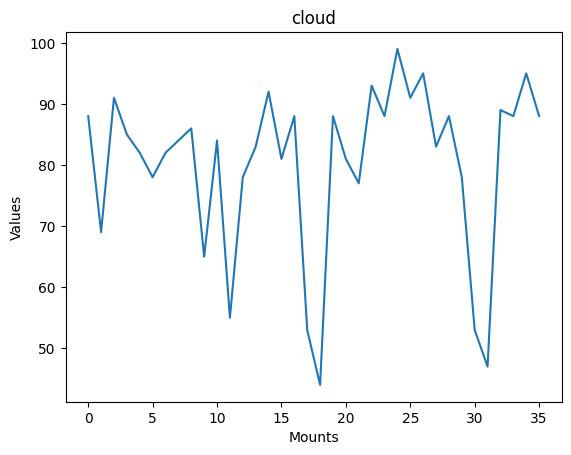

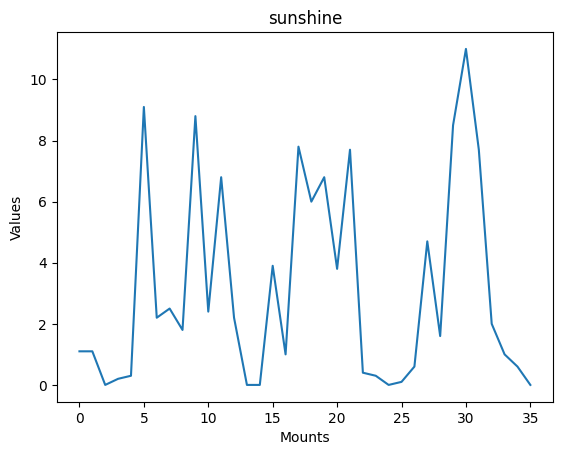

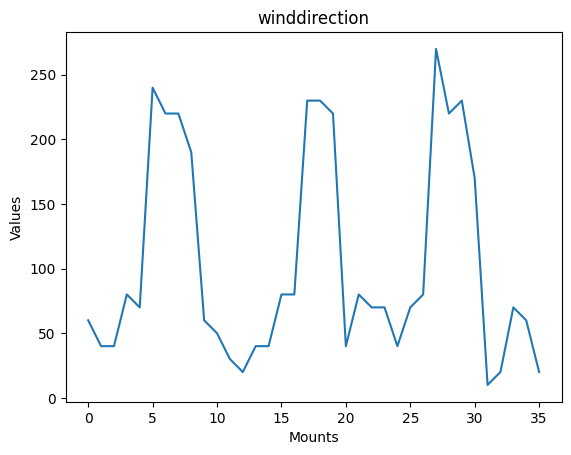

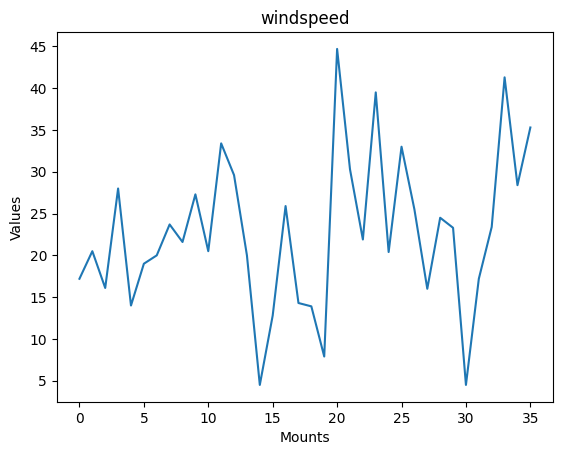

In [346]:
YEAR = 365

for col in train_data.columns[2:-1]:
    pd.DataFrame(train_data[col].values[0:YEAR*3:N]).plot(title=col, legend=False, xlabel='Mounts', ylabel="Values")

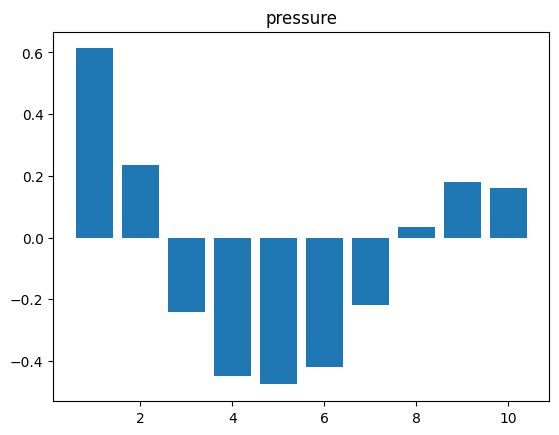

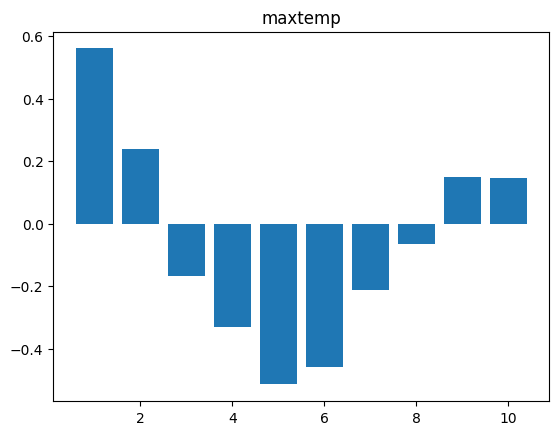

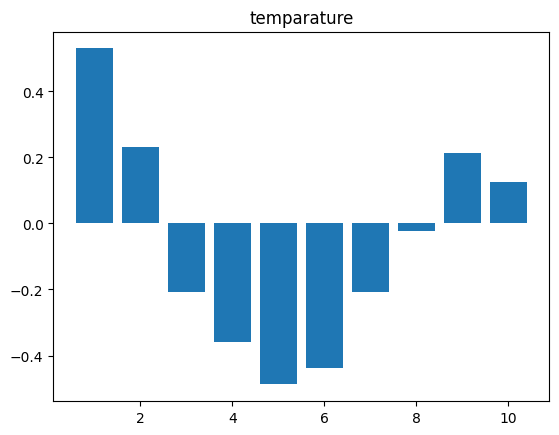

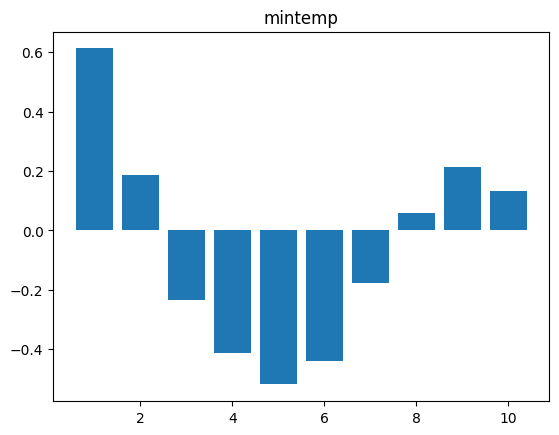

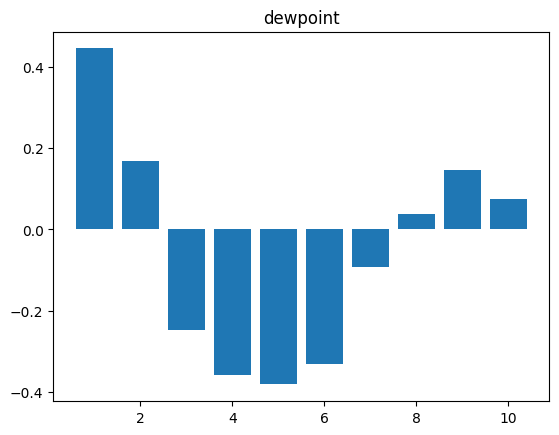

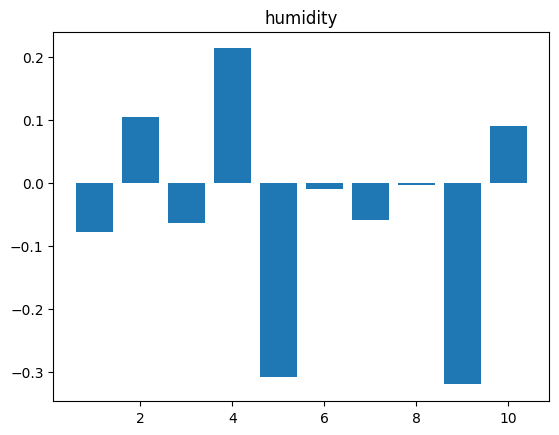

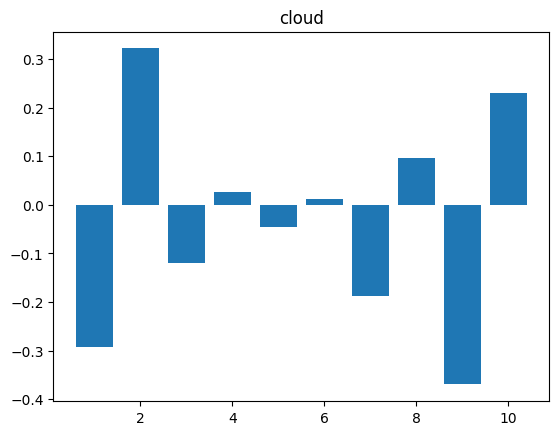

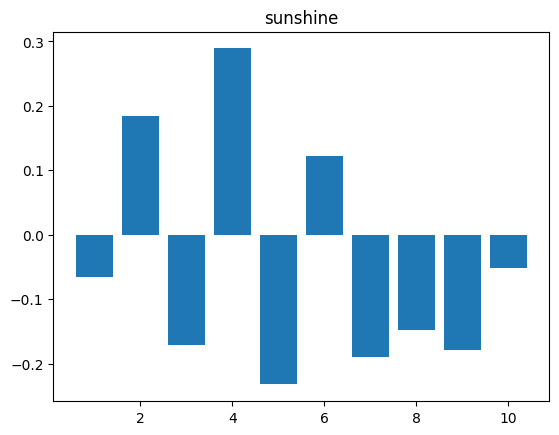

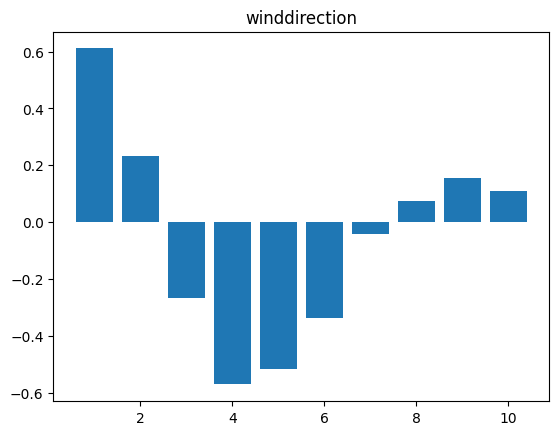

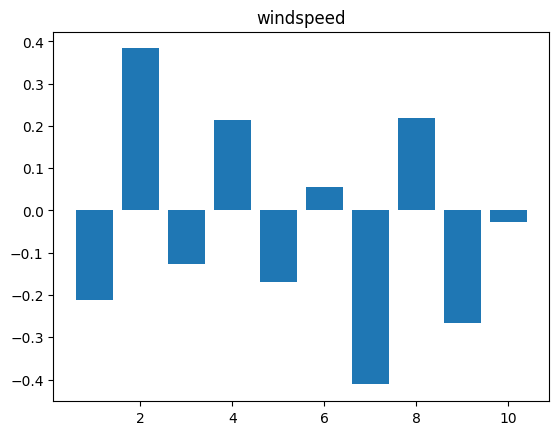

In [347]:
from statsmodels.tsa.stattools import acf

r_col = {}
for col in train_data.columns[2:-1]:
    r_col[col] = acf(train_data[col].values[0:YEAR*1:N])


for col in train_data.columns[2:-1]:
    plt.subplots(1, 1)
    plt.title(col)
    plt.bar(np.arange(1, len(r_col[col][1:]) + 1, 1), r_col[col][1:])

In [348]:


# train_data_copy["pressure"] = train_data_copy["pressure"].diff(LAG)
# train_data_copy["maxtemp"] = train_data_copy["maxtemp"].diff(LAG)
# train_data_copy["temparature"] = train_data_copy["temparature"].diff(LAG)
# train_data_copy["mintemp"] = train_data_copy["mintemp"].diff(LAG)
# train_data_copy["dewpoint"] = train_data_copy["dewpoint"].diff(LAG)
# train_data_copy["winddirection"] = train_data_copy["winddirection"].diff(LAG)

# train_data_copy.dropna(inplace=True)

# for col in train_data_copy.columns[2:-1]:
#     pd.DataFrame(train_data_copy[col].values[0:YEAR*3:N]).plot(title=col, legend=False, xlabel='Mounts', ylabel="Values")

from statsmodels.tsa.seasonal import seasonal_decompose

LAG = 5
train_data_copy = copy.copy(train_data)

for col in train_data_copy.columns[2:-1]:
    decomposition = seasonal_decompose(train_data_copy[col], model='additive', period=365)
    train_data_copy[col] -= decomposition.seasonal

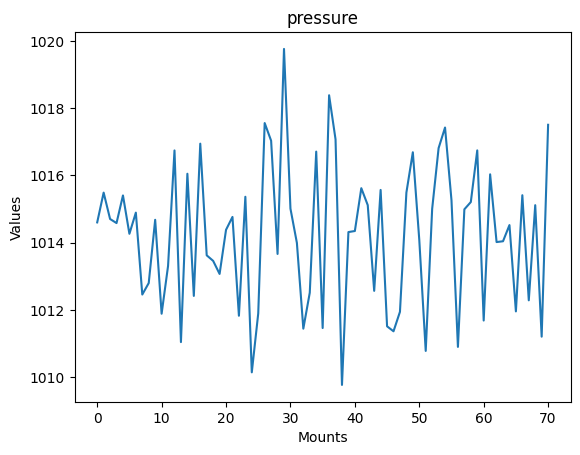

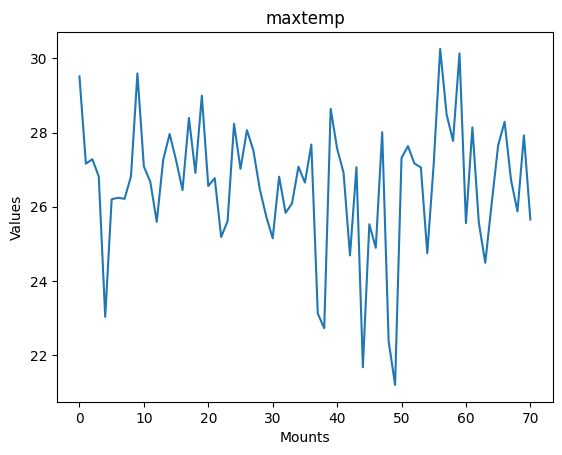

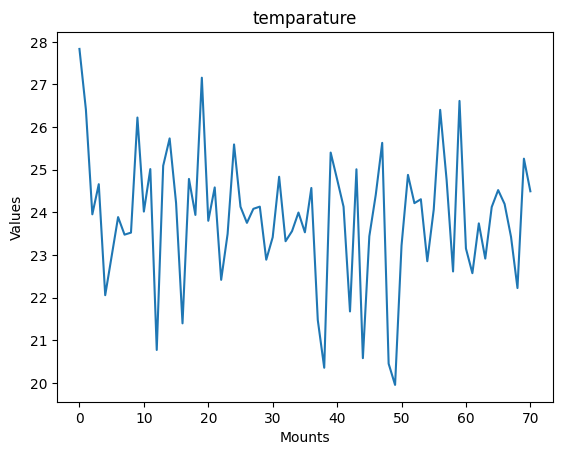

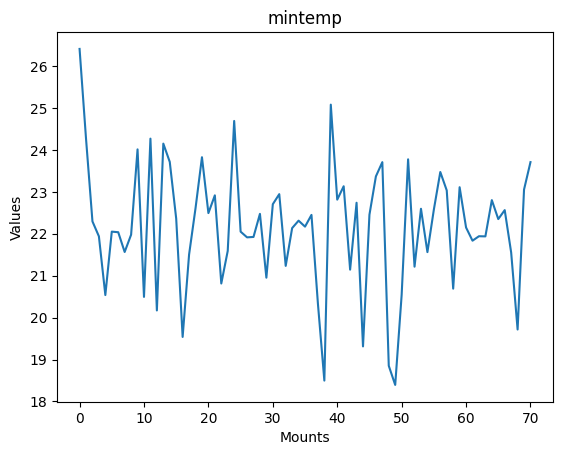

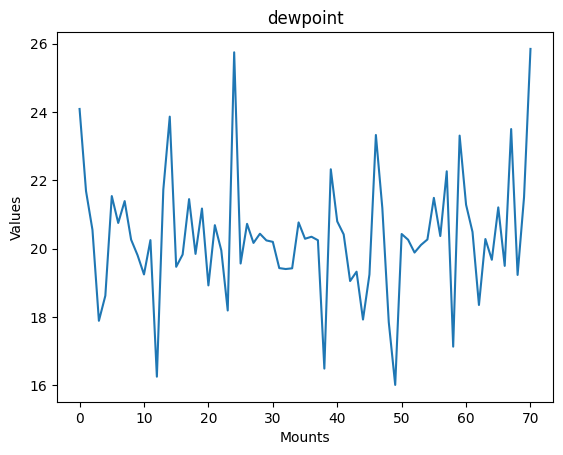

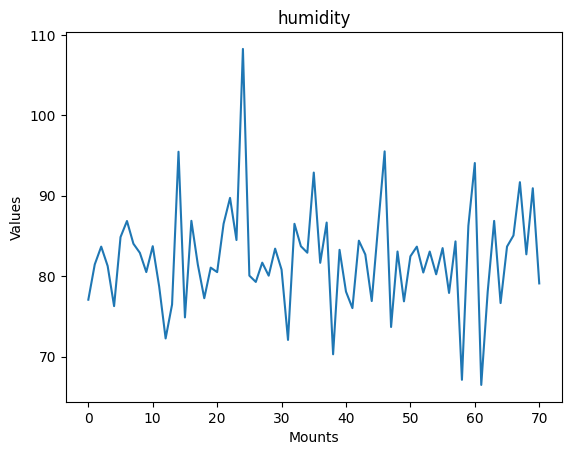

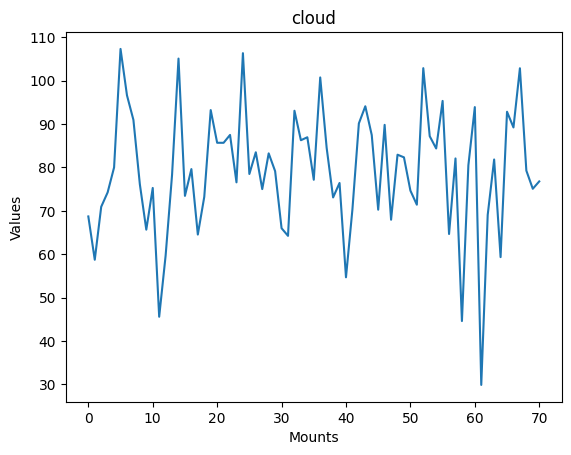

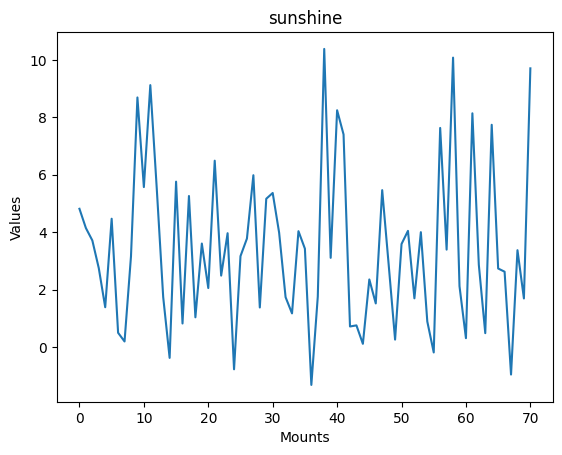

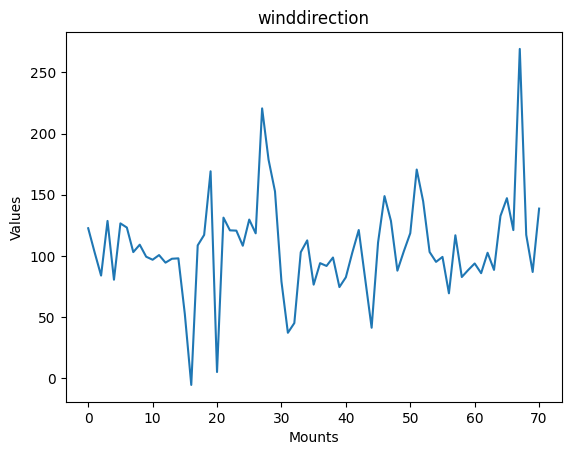

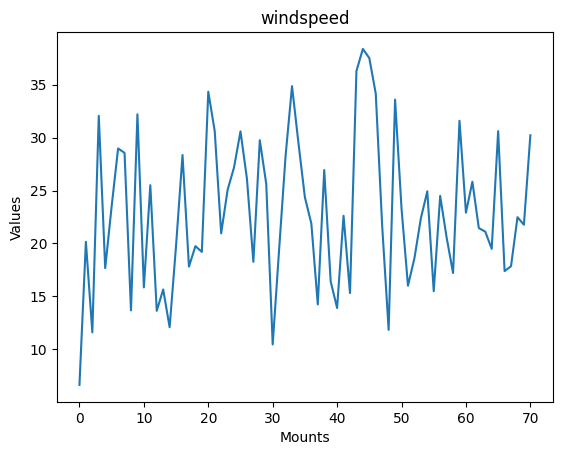

In [349]:
for col in train_data_copy.columns[2:-1]:
    pd.DataFrame(train_data_copy[col].values[::N]).plot(title=col, legend=False, xlabel='Mounts', ylabel="Values")

In [350]:
from statsmodels.tsa.stattools import adfuller

for col in train_data_copy.columns[2:-1]:
    try:
        result = adfuller(train_data_copy[col].values)
        print(f"{col}: ADF Stat: {result[0]}, p-val: {result[1]}")
    except:
        print(":(")

pressure: ADF Stat: -21.464922531895585, p-val: 0.0
maxtemp: ADF Stat: -20.508999945996557, p-val: 0.0
temparature: ADF Stat: -20.220646243731483, p-val: 0.0
mintemp: ADF Stat: -20.516185924756847, p-val: 0.0
dewpoint: ADF Stat: -8.733093103326926, p-val: 3.1527717782722495e-14
humidity: ADF Stat: -22.716869817499116, p-val: 0.0
cloud: ADF Stat: -18.77899644219169, p-val: 2.02442539224549e-30
sunshine: ADF Stat: -44.09302033932129, p-val: 0.0
winddirection: ADF Stat: -19.11359049534001, p-val: 0.0
windspeed: ADF Stat: -21.55104950107165, p-val: 0.0


In [351]:
from statsmodels.tsa.stattools import kpss
import warnings

warnings.filterwarnings("ignore")

for col in train_data_copy.columns[2:-1]:
    try:
        result = kpss(train_data_copy[col].values, regression="ct", nlags=N*5)
        print(f"{col}: kpss_stat: {result[0]}, p-val: {result[1]}")
    except:
        print(":(")

pressure: kpss_stat: 0.08195975997609256, p-val: 0.1
maxtemp: kpss_stat: 0.056521367795590936, p-val: 0.1
temparature: kpss_stat: 0.0757608791387907, p-val: 0.1
mintemp: kpss_stat: 0.0841297316383713, p-val: 0.1
dewpoint: kpss_stat: 0.08525765732745536, p-val: 0.1
humidity: kpss_stat: 0.06902617821789171, p-val: 0.1
cloud: kpss_stat: 0.09914007335912195, p-val: 0.1
sunshine: kpss_stat: 0.12530781190577084, p-val: 0.0883188668411651
winddirection: kpss_stat: 0.06099517884251226, p-val: 0.1
windspeed: kpss_stat: 0.09107455273874716, p-val: 0.1


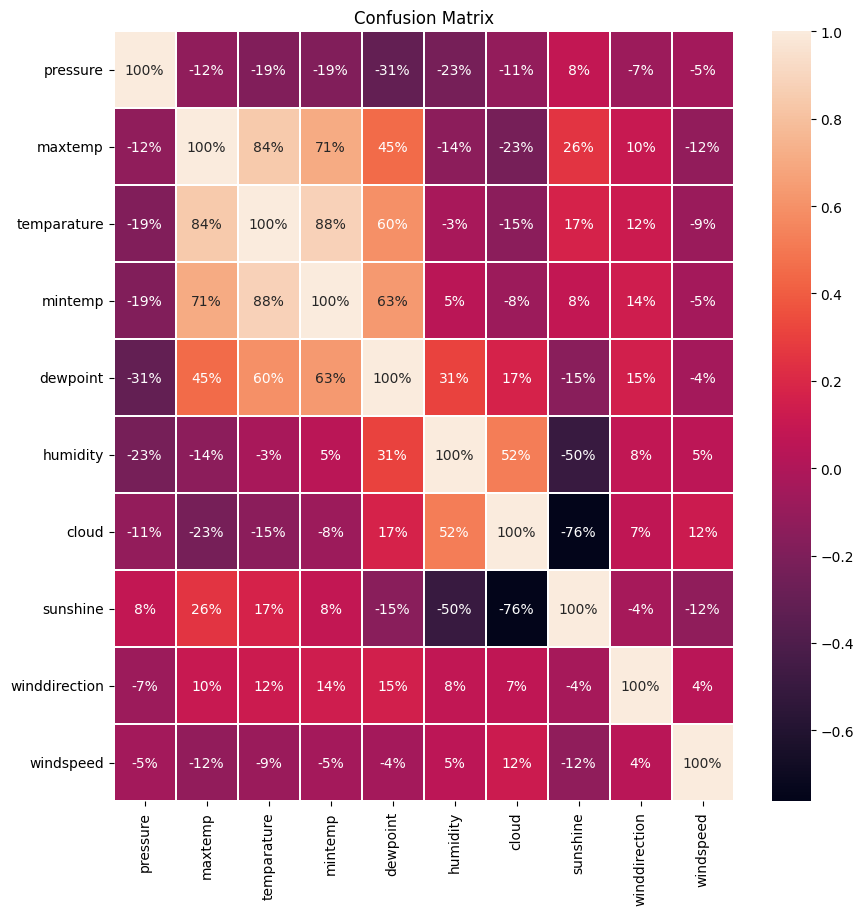

In [352]:
def draw_cov(data):
    figsize = (10,10)
    fig, ax = plt.subplots(figsize=figsize)
    plt.title('Confusion Matrix')
    se.heatmap(data.corr(), annot=True, fmt="0.0%", linewidth=0.1)

draw_cov(train_data_copy[train_data_copy.columns[2:-1]])

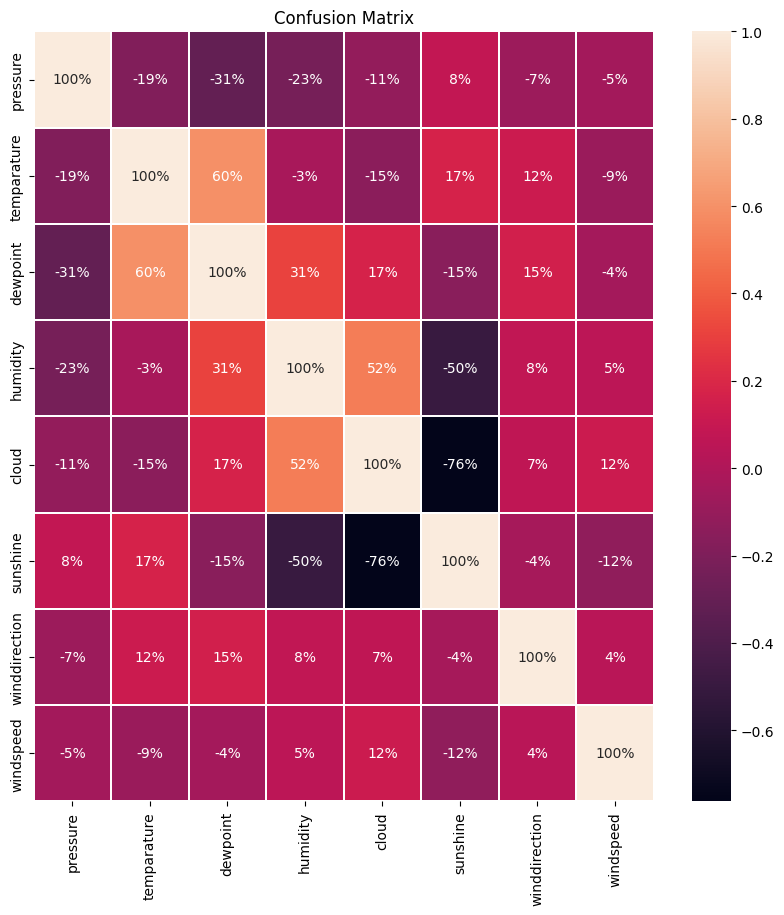

In [353]:
train_data_copy = train_data_copy.drop(["maxtemp", "mintemp"], axis=1) # "cloud", "sunshine", "dewpoint"
draw_cov(train_data_copy[train_data_copy.columns[2:-1]])

# Построение модели

In [354]:
train_data = train_data_copy

In [355]:
from sklearn.model_selection import train_test_split

X, y = train_data_copy[train_data_copy.columns[1:-1]].values, train_data_copy[train_data_copy.columns[-1]].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Лог регрессия (База)

In [356]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(max_iter=5_000, solver="saga", penalty="elasticnet", l1_ratio=0.1).fit(X_train, y_train)
model_log.score(X_test, y_test)

0.8059360730593608

In [357]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_log, X, y, cv=5)
scores.mean(), scores.std()

(0.8269406392694064, 0.006193908660388363)

## Что-то сложнее

- XGBoost Classifier

## predict (Байес не работает!)

In [ ]:
test_data = test_data.interpolate()
pred_log = model_log.predict_proba(test_data[train_data.columns[1:-1]])

In [361]:
def get_ans(pred):
    rez = list()
    for row in pred:
        rez.append(round(max(row), 1))
    data_ans = pd.DataFrame({"id":test_data["id"].values, "rainfall": rez})
    return data_ans